The purpose of this notebook is to use the IMDB files and find two things:
1. The average rating per genre
2. The total number of reviews per genre
3. Report each parameter as bar charts separately
4. Combine the parameters into a scatterplot 

In [18]:
pwd

'/Users/arthur/Documents/Flatiron/phase_1/Project/main_microsoft_movies/microsoft_movies'

In [6]:
cd ../..

/Users/arthur/Documents/Flatiron/phase_1/Project/main_microsoft_movies/microsoft_movies


In [70]:
#Import relevant packages
import pandas as pd
import matplotlib.pyplot as plt

In [71]:
#read in the relevant data files
basics_df = pd.read_csv("data/imdb.title.basics.csv")
ratings_df = pd.read_csv("data/imdb.title.ratings.csv")

In [72]:
#review the basics_df info
basics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [73]:
#review the basics_df info
basics_df.head(5)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [74]:
#review the basics_df info
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [75]:
#review the basics_df info
ratings_df.head(5)

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [76]:
#remove all rows without a genre
basics_df.dropna(subset=['genres'], inplace=True)

In [77]:
#coverted the genres column, which has genres separated by commas into
#list of strings
basics_df['genres'] = basics_df['genres'].str.strip().str.split(',')

In [78]:
#create a new df with the list of genres separated out into individual rows
e_basics_df = basics_df.explode('genres')
e_basics_df

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,Action
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,Crime
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,Drama
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,Biography
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,Drama
...,...,...,...,...,...,...
146138,tt9916428,The Secret of China,The Secret of China,2019,NaN,War
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy


In [79]:
#merge the e_basics_df with the ratings_df
combined_df = pd.merge(e_basics_df, ratings_df, how='inner', on='tconst')
combined_df

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,Action,7.0,77
1,tt0063540,Sunghursh,Sunghursh,2013,175.0,Crime,7.0,77
2,tt0063540,Sunghursh,Sunghursh,2013,175.0,Drama,7.0,77
3,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,Biography,7.2,43
4,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,Drama,7.2,43
...,...,...,...,...,...,...,...,...
128485,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
128486,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,Drama,8.7,136
128487,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,Family,8.7,136
128488,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8


In [80]:
#find the total number of votes by genre
counts_by_genre = combined_df.groupby('genres')['numvotes'].sum()

#convert the number of votes by genre series to dataframe
counts_df = counts_by_genre.to_frame()

In [81]:
#find the total number of votes by genre
avgcounts_by_genre = combined_df.groupby('genres')['numvotes'].mean()

#convert the number of votes by genre series to dataframe
avgcounts_df = avgcounts_by_genre.to_frame()
avgcounts_df.rename(columns={'numvotes': 'avgnumvotes'}, inplace=True)

In [82]:
#create column for average rating * number of votes
combined_df['avgrating_x_numvotes'] = combined_df['averagerating']*combined_df['numvotes']

In [83]:
#find the sumproduct of average rating and number of votes, group by genre
sp_by_genre = combined_df.groupby('genres')['avgrating_x_numvotes'].sum()

#convert sumproduct series to df
sp_df = sp_by_genre.to_frame()

In [84]:
#merge the number of votes df with the sumproduct df
counts_wavg_df = pd.merge(counts_df, sp_df, on='genres', how='inner')
counts_wavg_df = pd.merge(counts_wavg_df, avgcounts_df, on='genres', how='inner')

In [85]:
#check the merged df
counts_wavg_df.head()

,numvotes,avgrating_x_numvotes,avgnumvotes
genres,,,
Action,101161682,6.967373e+08,14476.485690
Adult,164,3.984000e+02,54.666667
Adventure,84232589,5.942541e+08,22067.746660
Animation,15353302,1.115380e+08,8808.549627
Biography,21609446,1.615254e+08,5673.259648


In [86]:
#create the weighted average column
counts_wavg_df['wavg_rating'] = counts_wavg_df['avgrating_x_numvotes'] / counts_wavg_df['numvotes']

In [87]:
#reset the index
counts_wavg_df = counts_wavg_df.reset_index()
#remove index 1, whcih is the adult genre
counts_wavg_df.drop(index=1, inplace=True)

In [88]:
#reset the index again
counts_wavg_df = counts_wavg_df.reset_index()

<AxesSubplot:xlabel='genres'>

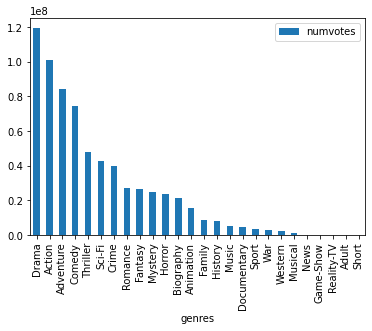

In [58]:
#first sort the data by number of votes, and then plot the bar graph: genre vs number of votes
counts_wavg_df.sort_values(by='numvotes', ascending=False).plot.bar(x='genres', y='numvotes')

<AxesSubplot:xlabel='genres'>

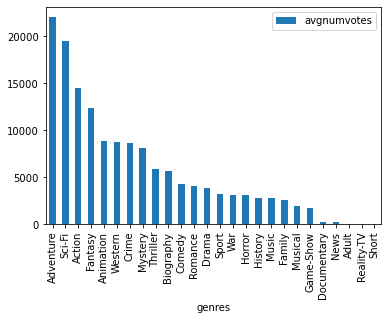

In [60]:
#
counts_wavg_df.sort_values(by='avgnumvotes', ascending=False).plot.bar(x='genres', y='avgnumvotes')

<AxesSubplot:xlabel='genres'>

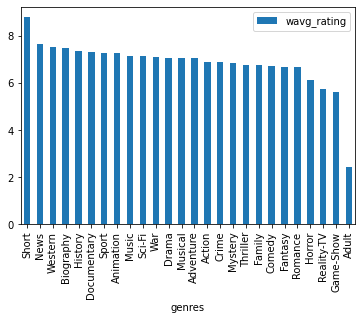

In [20]:
#first sort the data by weighted average, and then plot the bar graph: genre vs weighted average
counts_wavg_df.sort_values(by='wavg_rating', ascending=False).plot.bar(x='genres', y='wavg_rating')

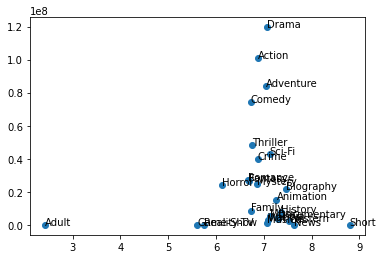

In [21]:
#plot scatter plot: weighted average vs number of votes
fig, ax = plt.subplots()
ax.scatter(x=counts_wavg_df['wavg_rating'], y=counts_wavg_df['numvotes'])
for i, txt in enumerate(counts_wavg_df['genres']):
    ax.annotate(txt, (counts_wavg_df['wavg_rating'][i], counts_wavg_df['numvotes'][i]))

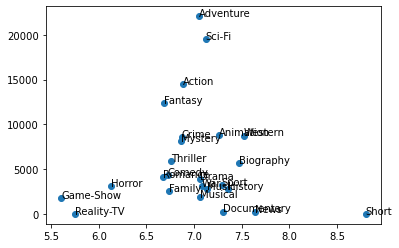

In [90]:
#plot scatter plot: weighted average vs number of votes
fig, ax = plt.subplots()
ax.scatter(x=counts_wavg_df['wavg_rating'], y=counts_wavg_df['avgnumvotes'])
for i, txt in enumerate(counts_wavg_df['genres']):
    ax.annotate(txt, (counts_wavg_df['wavg_rating'][i], counts_wavg_df['avgnumvotes'][i]))